<a href="https://colab.research.google.com/github/poziryna84/Neural-Network-Models/blob/master/Theory_Loss_Function_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

%matplotlib inline
from fastai.basics import *

The concepts of  **Stochastic Gradient Descent (SGD)** which is an *optimization* *method* commonly used in neural networks.


Linear Regression and its goal of fetting a line to a set of points.


In [0]:
n=100

In [9]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4945,  1.0000],
        [ 0.9684,  1.0000],
        [-0.6395,  1.0000],
        [-0.5090,  1.0000],
        [-0.6255,  1.0000]])

In [10]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:

y = x@a + torch.rand(n)

In [12]:
y

tensor([ 0.5588,  5.0903,  0.4429,  1.0184,  0.1617,  1.7429,  2.0471,  5.3572,
        -0.3827,  4.9319,  3.7714,  4.3974,  0.5007,  3.3875,  2.7853,  3.5673,
         1.2576,  0.8560,  1.6025,  5.4184,  1.0645,  1.4017,  3.5842,  3.5875,
         1.5629,  2.0761,  3.0186,  1.2390,  1.8463, -0.6388,  5.6904, -0.7734,
         1.2899,  4.6699,  3.5750,  4.5439, -0.2806,  4.9284, -0.1838,  4.5026,
         2.1089,  4.0298,  1.3285,  2.4013,  1.8409,  5.3075,  5.2196,  5.3394,
         1.3438,  5.0994,  5.4565,  2.7957,  1.0688,  0.4862,  0.7381,  3.7809,
         4.6178,  0.1689,  2.5868,  0.4002,  1.6406, -0.2101,  5.0275,  5.2033,
         1.2895,  3.1327,  1.0789,  0.0998,  1.2100,  0.2333, -0.2350,  1.7758,
         3.9524, -0.4870,  5.3609, -0.5509,  0.7203,  4.5482,  1.6903,  4.5769,
         1.0606, -0.8102,  4.3715,  0.4747,  3.5661, -0.2951,  3.1248,  3.6518,
        -0.6692,  5.1751, -0.0630,  0.7111,  5.6558, -0.6667,  4.7576,  0.2791,
         3.9693,  1.2004,  2.3672, -0.07

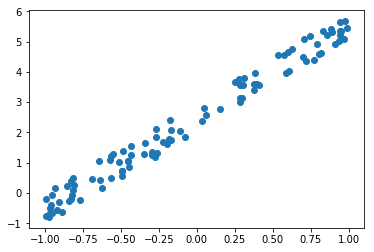

In [13]:
plt.scatter(x[:,0], y);


You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.


In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:

a = tensor(-1.,1)

In [99]:
y_hat = x@a
y_hat

tensor([1.4945, 0.0316, 1.6395, 1.5090, 1.6255, 1.1674, 1.1079, 0.0550, 1.9595,
        0.0903, 0.7242, 0.2300, 1.8138, 0.6233, 0.8479, 0.6955, 1.2948, 1.4459,
        1.1986, 0.1154, 1.6406, 1.4855, 0.6061, 0.6211, 1.4306, 1.1724, 0.7153,
        1.4327, 1.2654, 1.8872, 0.0230, 1.9925, 1.5490, 0.3980, 0.7160, 0.4226,
        1.8378, 0.2079, 1.8285, 0.3028, 1.2659, 0.3912, 1.2603, 1.1741, 1.0747,
        0.1087, 0.1422, 0.0516, 1.2919, 0.2915, 0.0092, 0.9535, 1.4545, 1.5617,
        1.4953, 0.6874, 0.1788, 1.9304, 0.9369, 1.8260, 1.3380, 1.9956, 0.0658,
        0.0589, 1.3446, 0.7173, 1.5704, 1.8154, 1.5661, 1.8512, 1.7711, 1.1818,
        0.6163, 1.9637, 0.1704, 1.9229, 1.4912, 0.4636, 1.2210, 0.1946, 1.4496,
        1.9722, 0.2803, 1.6889, 0.5915, 1.9041, 0.7023, 0.7502, 1.9688, 0.2572,
        1.8210, 1.4919, 0.0544, 1.9533, 0.3741, 1.8067, 0.4123, 1.2734, 0.9633,
        1.9545])

In [100]:
mse(y_hat, y)

tensor(8.4679)

Let´s plot the result:

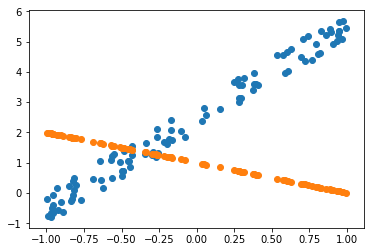

In [101]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# ***Manual approach:***

# Looking for the intercept.

In [0]:
intersept = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

tensor(59.2162) -5
tensor(45.7581) -4
tensor(34.3001) -3
tensor(24.8421) -2
tensor(17.3840) -1
tensor(11.9260) 0
tensor(8.4679) 1
tensor(7.0099) 2
tensor(7.5519) 3
tensor(10.0938) 4
tensor(14.6358) 5
The minimum error:
tensor(7.0099)
The intecept of:
2


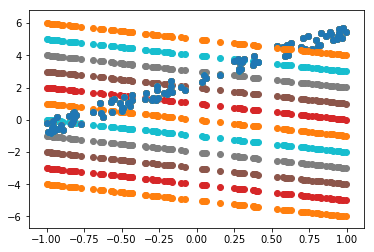

In [146]:
errors = []
for i in intersept:
  a = tensor(-1.,i)
  y_hat = x@a
  error =  mse(y_hat, y)
  print(error, i)
  errors.append(error)
  plt.scatter(x[:,0],y)
  plt.scatter(x[:,0],y_hat);
minimum_error = min(errors)
min_err_index = errors.index(minimum_error)
best_intercept = intersept[min_err_index]
print('The minimum error:')
print( minimum_error)
print('The intecept of:')
print(best_intercept)

  

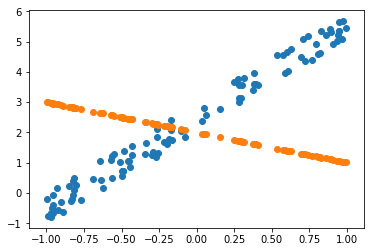

In [119]:
a = tensor(-1.,best_intercept)
y_hat = x@a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

Error VS Intercept

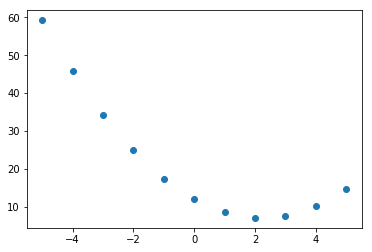

In [152]:
plt.scatter(np.asarray(intersept),np.asarray(errors))


# Looking for the gradient.

In [0]:
gradient = [-15., -14., -13., -12., -11., -10., -9., -8., -7., -6., -5., -4., -3., -2., -1., 0., 3.,4.,5.,6.,7.,8.,9., 10.]

tensor(137.5087) -15.0
tensor(122.6639) -14.0
tensor(108.6688) -13.0
tensor(95.5235) -12.0
tensor(83.2279) -11.0
tensor(71.7821) -10.0
tensor(61.1861) -9.0
tensor(51.4399) -8.0
tensor(42.5435) -7.0
tensor(34.4968) -6.0
tensor(27.2999) -5.0
tensor(20.9527) -4.0
tensor(15.4553) -3.0
tensor(10.8077) -2.0
tensor(7.0099) -1.0
tensor(4.0619) 0.0
tensor(0.3163) 3.0
tensor(0.7673) 4.0
tensor(2.0681) 5.0
tensor(4.2187) 6.0
tensor(7.2191) 7.0
tensor(11.0692) 8.0
tensor(15.7691) 9.0
tensor(21.3187) 10.0
The minimum error:
tensor(0.3163)
The intecept of:
3.0


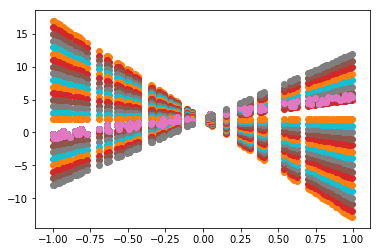

In [155]:
errors = []
for i in gradient:
  a = tensor(i,best_intercept)
  y_hat = x@a
  error =  mse(y_hat, y)
  print(error, i)
  errors.append(error)
  plt.scatter(x[:,0],y)
  plt.scatter(x[:,0],y_hat);
minimum_error = min(errors)
min_err_index = errors.index(minimum_error)
best_gradient = gradient[min_err_index]
print('The minimum error:')
print( minimum_error)
print('The intecept of:')
print(best_gradient)

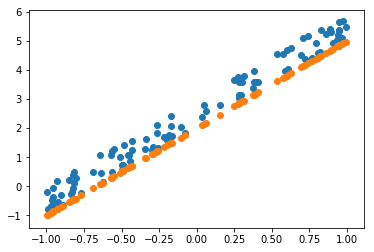

In [156]:
a = tensor(best_gradient,best_intercept)
y_hat = x@a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

Error VS Gradient

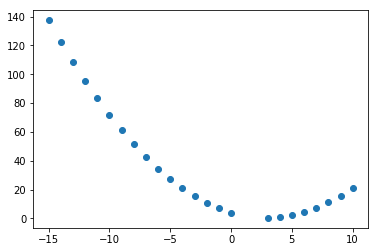

In [157]:
plt.scatter(np.asarray(gradient),np.asarray(errors))

# Looking for both at the same time.

tensor(177.4054) -5 -15.0
tensor(165.7059) -4 -15.0
tensor(156.0064) -3 -15.0
tensor(148.3068) -2 -15.0
tensor(142.6073) -1 -15.0
tensor(138.9078) 0 -15.0
tensor(137.2082) 1 -15.0
tensor(137.5087) 2 -15.0
tensor(139.8092) 3 -15.0
tensor(144.1096) 4 -15.0
tensor(150.4101) 5 -15.0
tensor(163.4398) -5 -14.0
tensor(151.6147) -4 -14.0
tensor(141.7895) -3 -14.0
tensor(133.9644) -2 -14.0
tensor(128.1393) -1 -14.0
tensor(124.3141) 0 -14.0
tensor(122.4890) 1 -14.0
tensor(122.6639) 2 -14.0
tensor(124.8387) 3 -14.0
tensor(129.0136) 4 -14.0
tensor(135.1884) 5 -14.0
tensor(150.3240) -5 -13.0
tensor(138.3732) -4 -13.0
tensor(128.4225) -3 -13.0
tensor(120.4717) -2 -13.0
tensor(114.5210) -1 -13.0
tensor(110.5703) 0 -13.0
tensor(108.6195) 1 -13.0
tensor(108.6688) 2 -13.0
tensor(110.7180) 3 -13.0
tensor(114.7673) 4 -13.0
tensor(120.8165) 5 -13.0
tensor(138.0579) -5 -12.0
tensor(125.9816) -4 -12.0
tensor(115.9052) -3 -12.0
tensor(107.8289) -2 -12.0
tensor(101.7525) -1 -12.0
tensor(97.6762) 0 -12.0
tensor

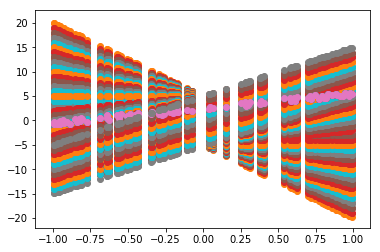

In [158]:
errors = []
grad = []
ints = []
for g in gradient:
  for i in intersept:
    a = tensor(g,i)
    y_hat = x@a
    error =  mse(y_hat, y)
    grad.append(g)
    ints.append(i)
    print(error, i, g)
    errors.append(error)
    plt.scatter(x[:,0],y)
    plt.scatter(x[:,0],y_hat);
minimum_error = min(errors)
min_err_index = errors.index(minimum_error)
best_intercept = ints[min_err_index]
best_grad = grad[min_err_index]
print('The minimum error:')
print( minimum_error)
print('The intecept of:')
print(best_intercept)
print('The gradient of:')
print(best_grad)

Both Gradient and Intercept VS Error

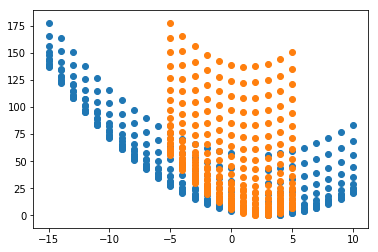

In [159]:
plt.scatter(np.asarray(grad),np.asarray(errors))
plt.scatter(np.asarray(ints),np.asarray(errors))


# Gradient Descent Function.

In [202]:
a = tensor(-1.,1); a

tensor([-1.,  1.])

In [203]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()


In [204]:
lr = 2e-1
for t in range(100): update()

tensor(8.4679, grad_fn=<MeanBackward0>)
tensor(0.2726, grad_fn=<MeanBackward0>)
tensor(0.0898, grad_fn=<MeanBackward0>)
tensor(0.0851, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)
tensor(0.0850, grad_fn=<MeanBackward0>)


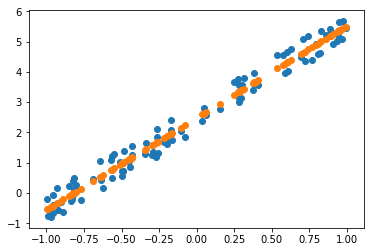

In [205]:

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

# Play with it

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [188]:

a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)